In [1]:
#!/usr/bin/env python3.6
# -*- coding: utf-8 -*-

In [2]:
# Imports
import sys
import joblib
import numpy as np
from matplotlib import animation
from IPython.display import HTML
from matplotlib import pyplot as plt
import mpl_toolkits.mplot3d.axes3d as p3

In [3]:
#np.random.seed(20)
np.set_printoptions(threshold=sys.maxsize)

In [4]:
%matplotlib inline

In [5]:
%store -r X_relative_footsteps_acc_absolute
%store -r Y_relative_footsteps_acc_absolute
print(X_relative_footsteps_acc_absolute.shape)
print(Y_relative_footsteps_acc_absolute.shape)

(4250, 28)
(4250, 4)


# Multivariate Linear Regression (Foot prediction)

In [6]:
import sklearn
from sklearn import metrics
from sklearn.feature_selection import RFE
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures 
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [7]:
# Entries where RL swings
idxs = np.where(X_relative_footsteps_acc_absolute[:, 22] == 1)[0]
X_relative_footsteps_acc_absolute_RL_swing = X_relative_footsteps_acc_absolute[idxs]
Y_relative_footsteps_acc_absolute_RL_swing = Y_relative_footsteps_acc_absolute[idxs]

## Predict RL foot -> x

In [8]:
X_relative_footsteps_acc_absolute_RL_swing[0, :]

array([ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  2.50419845e-02,
        6.19822636e-02,  3.96379886e-02,  5.31522544e-02,  6.97049651e-03,
       -2.67193459e-02,  2.34714167e-01,  1.75105222e-01, -4.30952825e-01,
        2.29214080e-01, -1.81607474e-01, -4.31298092e-01, -2.51563776e-01,
        1.50846000e-01, -4.29710303e-01, -2.45781366e-01, -1.65071914e-01,
       -4.29886200e-01,  0.00000000e+00,  1.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  8.56956835e+01,  8.56913844e+01])

In [9]:
X_relative_footsteps_acc_absolute_RL_swing[0, :]

array([ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  2.50419845e-02,
        6.19822636e-02,  3.96379886e-02,  5.31522544e-02,  6.97049651e-03,
       -2.67193459e-02,  2.34714167e-01,  1.75105222e-01, -4.30952825e-01,
        2.29214080e-01, -1.81607474e-01, -4.31298092e-01, -2.51563776e-01,
        1.50846000e-01, -4.29710303e-01, -2.45781366e-01, -1.65071914e-01,
       -4.29886200e-01,  0.00000000e+00,  1.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  8.56956835e+01,  8.56913844e+01])

### Linear Regression

In [10]:
# Input
X = np.hstack((X_relative_footsteps_acc_absolute_RL_swing[:, :3], # prev velocity command
               X_relative_footsteps_acc_absolute_RL_swing[:, -3:], # commanded velocity command
               X_relative_footsteps_acc_absolute_RL_swing[:, 9:11], # FL (x,y) position
               X_relative_footsteps_acc_absolute_RL_swing[:, 12:14], # FR (x,y) position
               X_relative_footsteps_acc_absolute_RL_swing[:, 15:17], # RL (x,y) position
               X_relative_footsteps_acc_absolute_RL_swing[:, 18:20])) # RR (x,y) position

# Target
Y = np.array([Y_relative_footsteps_acc_absolute_RL_swing[:, 2]]).T

assert Y.shape[0] == X.shape[0]

# Split data into train and test set
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size = 0.8, shuffle=True, random_state=100)

# Create the model
model_rl_relative_swinging_x = LinearRegression()

# Fit the model
model_rl_relative_swinging_x.fit(X_train, Y_train)

# Predict
predictions = model_rl_relative_swinging_x.predict(X_test)

# Stats
print('R2: ', r2_score(predictions, Y_test))
print('RMSE: ', np.sqrt(mean_squared_error(Y_test, predictions)))
print("The lowest error is: ", np.min(np.abs(predictions - Y_test)))
print("The highest error is: ", np.max(np.abs(predictions - Y_test)))
print("The avg. error is: ", np.mean(np.abs(predictions - Y_test)))
#print("Seq of errors (descendant): \n", sorted(np.abs(predictions - Y_test).tolist(), reverse=True))

R2:  0.9673472411387558
RMSE:  0.0065716231561306
The lowest error is:  7.308103715353287e-06
The highest error is:  0.0301143843458756
The avg. error is:  0.00424934600171163


In [11]:
model_rl_relative_swinging_x.coef_

array([[ 8.21098489e-03,  7.07333497e-15,  0.00000000e+00,
         3.05311332e-16, -1.62595395e+00,  1.62598735e+00,
         2.94074079e-01, -4.45152732e-01, -6.49799847e-02,
        -9.78420511e-03, -8.19433438e-01,  1.23053034e-01,
        -3.98435449e-01, -6.02751171e-01]])

In [12]:
model_rl_relative_swinging_x.intercept_

array([-0.39870979])

Text(0, 0.5, 'Predictions')

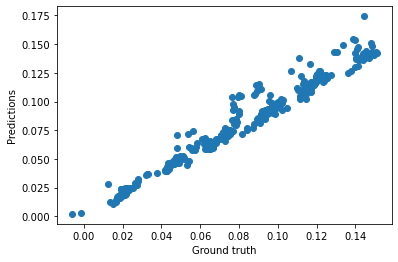

In [13]:
## The line / model
plt.scatter(Y_test, predictions)
plt.xlabel("Ground truth")
plt.ylabel("Predictions")

In [14]:
#%store model_rl_relative_swinging_x

In [15]:
#for idx, prediction in enumerate(predictions):
#    print(f'Start: {X_test[idx, 6]}. Groundtruth: {Y_test[idx]}. Predicted: {prediction}')

In [16]:
# Save model
#joblib.dump(model_rl_relative_swinging_x, "/home/itaouil/workspace/aliengo_ws/src/aliengo_navigation/models/protocol3/relative/model_rl_relative_swinging_x.sav")

### Predict RL foot -> y

In [18]:
# Input
X = np.hstack((X_relative_footsteps_acc_absolute_RL_swing[:, :3], # prev velocity command
               X_relative_footsteps_acc_absolute_RL_swing[:, -3:], # commanded velocity command
               X_relative_footsteps_acc_absolute_RL_swing[:, 9:11], # FL (x,y) position
               X_relative_footsteps_acc_absolute_RL_swing[:, 12:14], # FR (x,y) position
               X_relative_footsteps_acc_absolute_RL_swing[:, 15:17], # RL (x,y) position
               X_relative_footsteps_acc_absolute_RL_swing[:, 18:20])) # RR (x,y) position

# Target
Y = np.array([Y_relative_footsteps_acc_absolute_RL_swing[:, 3]]).T

assert Y.shape[0] == X.shape[0]

# Split data into train and test set
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size = 0.8, shuffle=True, random_state=100)

# Create the model
model_rl_relative_swinging_y = LinearRegression()

# Fit the model
model_rl_relative_swinging_y.fit(X_train, Y_train)

# Predict
predictions = model_rl_relative_swinging_y.predict(X_test)

# Stats
print('R2: ', r2_score(predictions, Y_test))
print('RMSE: ', np.sqrt(mean_squared_error(Y_test, predictions)))
print("The lowest error is: ", np.min(np.abs(predictions - Y_test)))
print("The highest error is: ", np.max(np.abs(predictions - Y_test)))
print("The avg. error is: ", np.mean(np.abs(predictions - Y_test)))
#print("Seq of errors (descendant): \n", sorted(np.abs(predictions - Y_test).tolist(), reverse=True))

R2:  0.8121752446826552
RMSE:  0.0018511965077763208
The lowest error is:  1.8459447476693036e-06
The highest error is:  0.009499710873936806
The avg. error is:  0.0011527458338442056


In [19]:
model_rl_relative_swinging_y.coef_

array([[ 4.11048606e-03,  4.48505724e-15, -2.34621350e-16,
         2.49800181e-16,  2.61423053e-01, -2.61412939e-01,
         1.68122787e-01,  3.80497972e-01, -9.47037220e-02,
         3.18166576e-01,  3.47602606e-02, -5.06686210e-01,
         1.18824158e-02, -1.88079246e-01]])

In [20]:
model_rl_relative_swinging_y.intercept_

array([0.03302707])

Text(0, 0.5, 'Predictions')

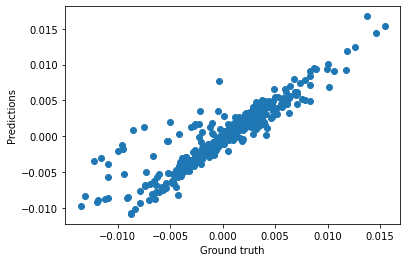

In [21]:
## The line / model
plt.scatter(Y_test, predictions)
plt.xlabel("Ground truth")
plt.ylabel("Predictions")

In [21]:
#%store model_rl_relative_swinging_y

In [22]:
#for idx, prediction in enumerate(predictions):
#    print(f'Groundtruth: {Y_test[idx]}. Predicted: {prediction}')

In [75]:
# Save model
#joblib.dump(model_rl_relative_swinging_y, "/home/itaouil/workspace/aliengo_ws/src/aliengo_navigation/models/protocol3/relative/model_rl_relative_swinging_y.sav")